In [1]:
#Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
Lipinski = pd.read_csv("C:\Lipinski.csv")
Lipinski.head()

,Name,Molecular_Weight,XLogP,H-Bond_Donor_Count,H-Bond_Acceptor_Count,SMILES
0,Glycyrrhizin,822.9,3.7,8,16,C[C@]12CC[C@](C[C@H]1C3=CC(=O)[C@@H]4[C@]5(CC[...
1,Etoposide,588.6,0.6,3,13,C[C@@H]1OC[C@@H]2[C@@H](O1)[C@@H]([C@H]([C@@H]...
2,Vinblastine,811.0,3.7,3,12,CC[C@@]1(C[C@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC...
3,Vincristine,825.0,2.8,3,12,CC[C@@]1(C[C@@H]2C[C@@](C3=C(CCN(C2)C1)C4=CC=C...
4,Sorafenib,464.8,4.1,3,7,CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...


In [4]:
#Display dataset structure including columns,dtypes,and non-null values
Lipinski.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   160 non-null    object 
 1   Molecular_Weight       160 non-null    float64
 2   XLogP                  160 non-null    float64
 3   H-Bond_Donor_Count     160 non-null    int64  
 4   H-Bond_Acceptor_Count  160 non-null    int64  
 5   SMILES                 160 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 7.6+ KB


In [5]:
#Show the names of all available columns
print(Lipinski.columns)

Index(['Name', 'Molecular_Weight', 'XLogP', 'H-Bond_Donor_Count',
       'H-Bond_Acceptor_Count', 'SMILES'],
      dtype='object')


In [6]:
#Drop columns that are not relevant for lipinski rule analysis
Lipinski = Lipinski.drop(columns=['Name', 'SMILES'])
print(Lipinski.columns)

Index(['Molecular_Weight', 'XLogP', 'H-Bond_Donor_Count',
       'H-Bond_Acceptor_Count'],
      dtype='object')


In [7]:
# Applying lipinski's rule of 5
# Returns 1 for Drug-like (0 or 1 violations), 0 for Non-drug-like (more than 1 violation)
def Lipinski_rule(row):
    molecular_weight = row['Molecular_Weight']
    xlogp = row['XLogP']
    h_bond_donors = row['H-Bond_Donor_Count']
    h_bond_acceptors = row['H-Bond_Acceptor_Count']
    
    violations = 0

    if molecular_weight > 500:
        violations += 1
    if xlogp > 5:
        violations += 1
    if h_bond_donors > 5:
        violations += 1
    if h_bond_acceptors > 10:
        violations += 1

    if violations > 1:
        return 0
    else:
        return 1

In [8]:
#Add 'Target' column to classify compounds for machine learning
Lipinski['Target']=Lipinski.apply(Lipinski_rule,axis=1)
print(Lipinski)

     Molecular_Weight  XLogP  H-Bond_Donor_Count  H-Bond_Acceptor_Count  \
0               822.9    3.7                   8                     16   
1               588.6    0.6                   3                     13   
2               811.0    3.7                   3                     12   
3               825.0    2.8                   3                     12   
4               464.8    4.1                   3                      7   
..                ...    ...                 ...                    ...   
155             572.7    3.5                   4                      7   
156             588.5    1.4                   9                     14   
157             684.6   -1.1                   7                     17   
158             404.4   -0.4                   6                     10   
159             586.6    2.2                   5                     11   

     Target  
0         0  
1         0  
2         0  
3         0  
4         1  
..      ...  
1

In [9]:
# Check distribution of drug-like (1) and non-drug-like (0) compounds
Lipinski['Target'].value_counts()

Target
1    103
0     57
Name: count, dtype: int64

In [10]:
# Separate features (X) and target labels (y) for machine learning
X = Lipinski[['Molecular_Weight', 'XLogP', 'H-Bond_Donor_Count',
       'H-Bond_Acceptor_Count']]  
y = Lipinski['Target']  

In [11]:
Lipinski.shape

(160, 5)

In [12]:
# Split the dataset into training and testing sets for model evaluation
train, test = train_test_split(Lipinski, test_size = 0.3)
print(train.shape)
print(test.shape)

(112, 5)
(48, 5)


In [13]:
train_X = train[['Molecular_Weight', 'XLogP', 'H-Bond_Donor_Count',
       'H-Bond_Acceptor_Count']]
train_y=train.Target
test_X= test[['Molecular_Weight', 'XLogP', 'H-Bond_Donor_Count',
       'H-Bond_Acceptor_Count']]
test_y =test.Target   

In [14]:
train_X.head(5)

,Molecular_Weight,XLogP,H-Bond_Donor_Count,H-Bond_Acceptor_Count
132,420.6,3.8,3,6
110,435.4,-0.8,4,10
26,522.6,2.0,4,12
30,520.5,2.9,4,9
52,430.9,4.2,3,7


In [15]:
test_X.head(5)

,Molecular_Weight,XLogP,H-Bond_Donor_Count,H-Bond_Acceptor_Count
4,464.8,4.1,3,7
57,619.7,5.1,3,10
102,411.4,2.0,5,8
129,404.9,2.1,3,5
154,581.6,5.2,3,11


In [16]:
train_y.head()

132    1
110    1
26     0
30     1
52     1
Name: Target, dtype: int64

In [17]:
# Train Logistic Regression, SVM, Decision Tree, and KNN models and evaluate their performance
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9166666666666666


In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = SVC(kernel= 'linear')
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is',accuracy_score(prediction,test_y))

The accuracy of the SVM is 0.8958333333333334


In [20]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9583333333333334


In [21]:
model = KNeighborsClassifier(n_neighbors= 3)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.75


In [22]:
#Visualization
sns.set(style='whitegrid')

In [26]:
Lipinski['Label'] = Lipinski['Target'].map({1: 'Druglike (1)', 0: 'Non-druglike (0)'})


In [27]:
palette = {'Druglike (1)': 'green', 'Non-druglike (0)': 'red'}


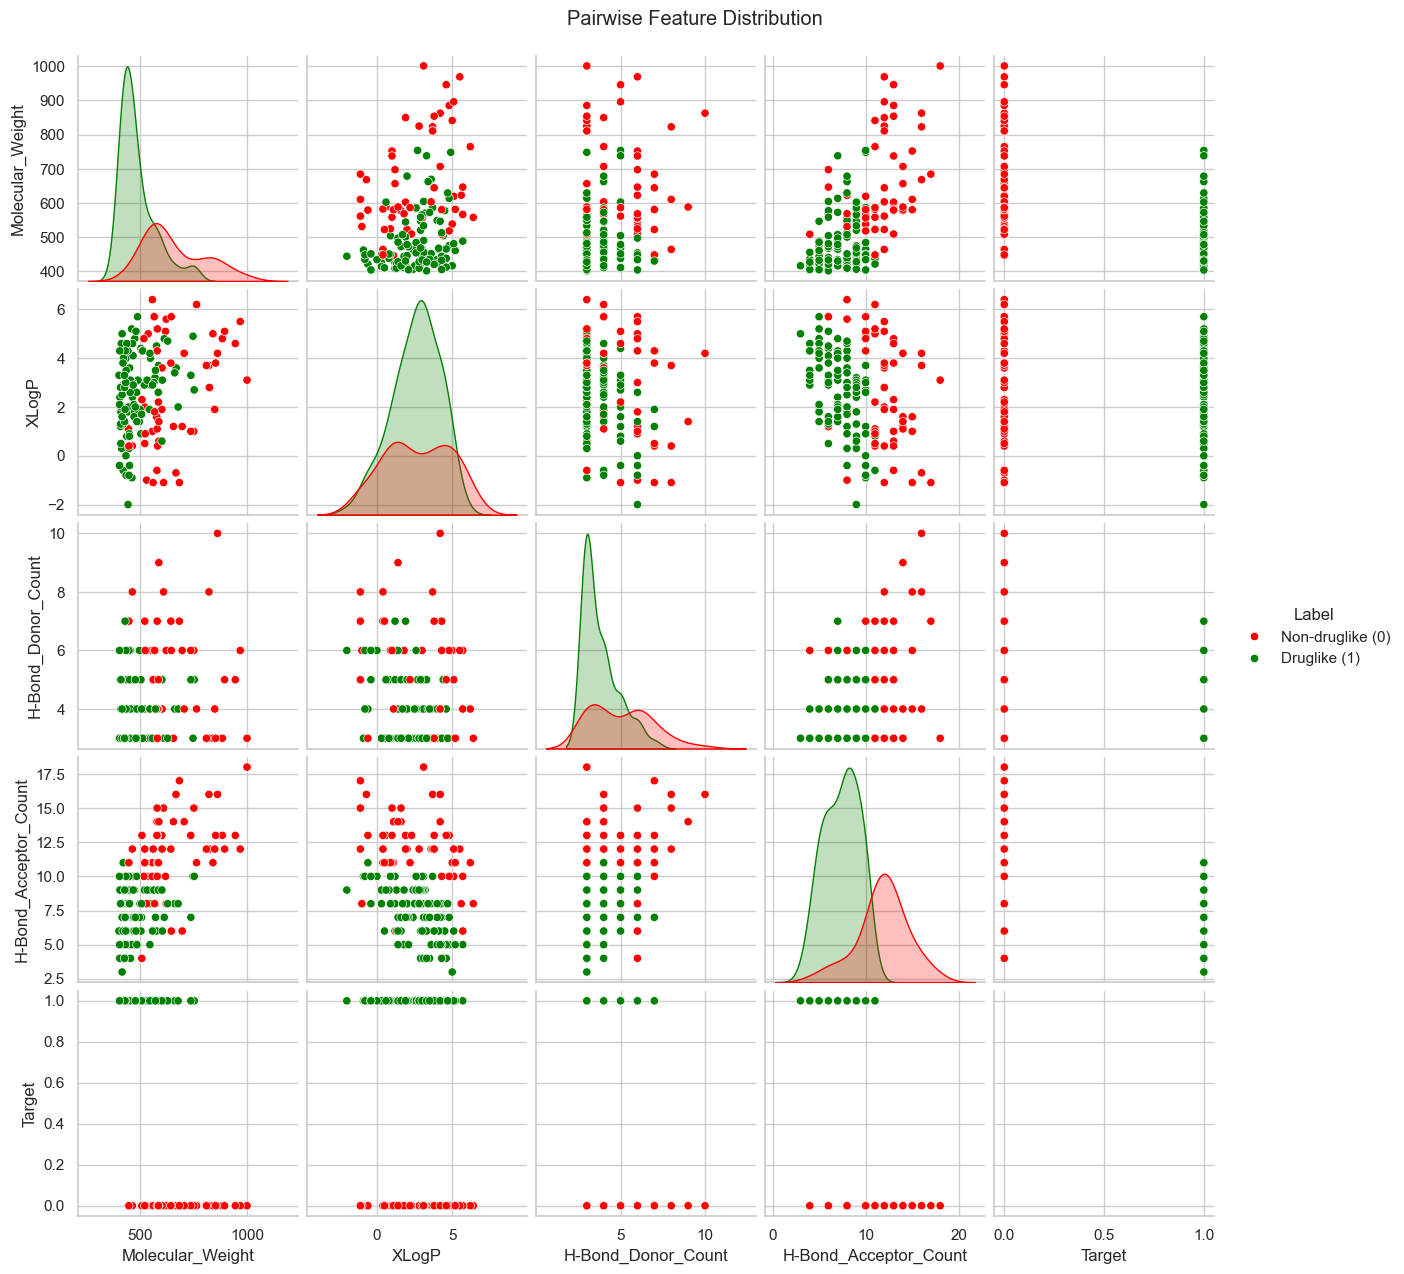

In [28]:
# Visualize pairwise relationships between features using seaborn pairplot
sns.pairplot(Lipinski, hue='Label', palette=palette)
plt.suptitle("Pairwise Feature Distribution", y=1.02)
plt.show()

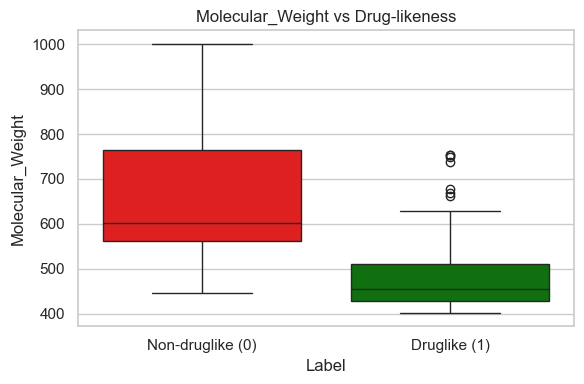

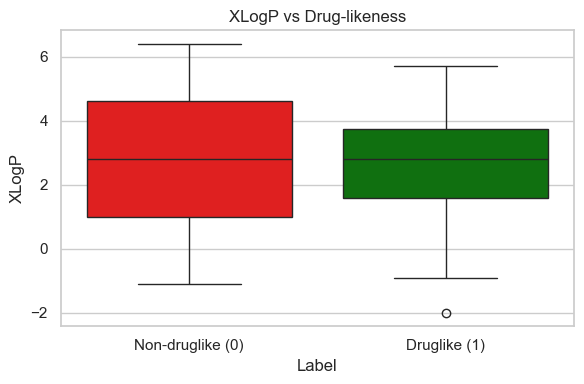

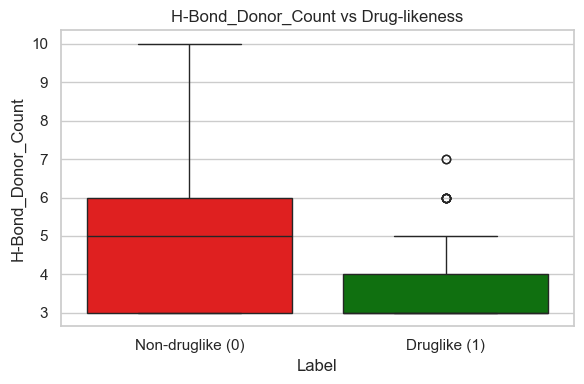

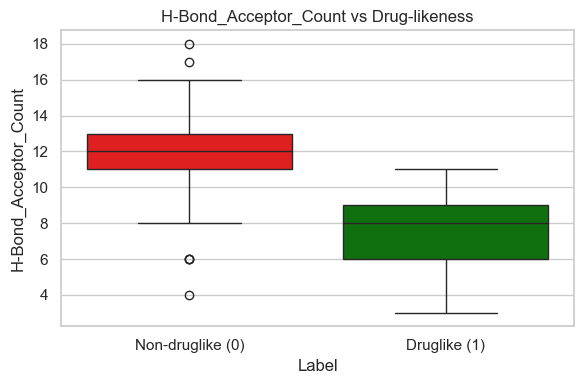

In [29]:
# Show distribution and outliers using a boxplot
features = ['Molecular_Weight', 'XLogP', 'H-Bond_Donor_Count', 'H-Bond_Acceptor_Count']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Label', y=feature, data=Lipinski, hue='Label', palette=palette)
    plt.title(f"{feature} vs Drug-likeness")
    plt.tight_layout()
    plt.show()

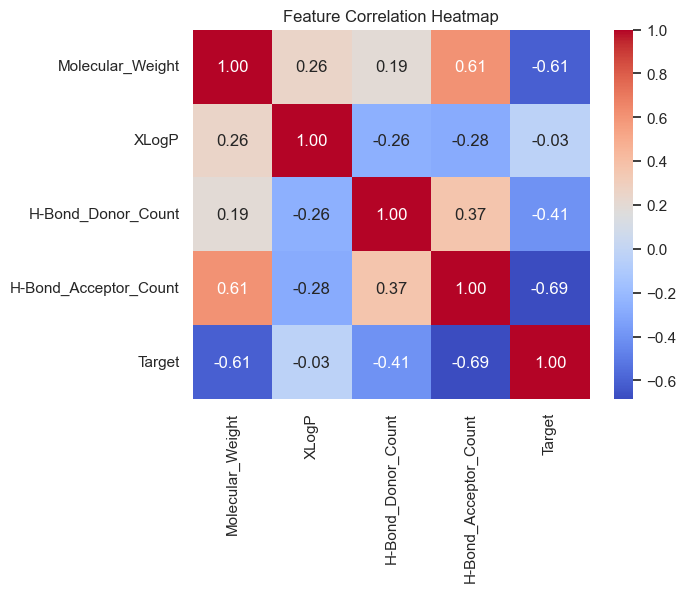

In [31]:
# Show correlation between features using a heatmap
corr = Lipinski[features + ['Target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()